In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
path = '../20250108_NH3/' # process 3
file = os.listdir(path)

dfs = []
for f in file[5:81]:
    dfs.append(pd.read_csv(path+f, index_col='Time'))    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)

def DropFromSecond(x):
    x = x * 100
    x = np.floor(x)
    return x/100

# Given the spectrometer measures 200 - 1100 nn, drop columns outside this range
# df = df[df.columns[296:]]
new_col = [str(DropFromSecond(x)) for x in df.columns.astype(float)]
df.columns = new_col
df.index = [0.5*i for i in range(len(df.index))]

# negative values replaced by zero
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        if df.iloc[i,j]<0:
            df.iloc[i,j]=0
            
df.head()

(7626, 2048)


,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
0.0,0.0,0.0,3.0,0.0,12.0,38.0,0.0,13.0,4.0,0.0,...,0.0,0.0,0.0,3.0,0.0,41.0,0.0,0.0,0.0,0.0
0.5,0.0,0.0,15.0,5.0,11.0,29.0,0.0,13.0,0.0,0.0,...,0.0,0.0,0.0,11.0,0.0,55.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,7.0,10.0,12.0,37.0,0.0,5.0,0.0,0.0,...,0.0,12.0,0.0,9.0,5.0,45.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,21.0,8.0,16.0,43.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,1.0,63.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,4.0,0.0,18.0,35.0,6.0,5.0,9.0,0.0,...,0.0,12.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0


In [7]:
# wavelength scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(df.columns).reshape(-1, 1))
wavelength_scaled = mm.transform(np.array(df.columns).reshape(-1, 1)).flatten() * 1142.08 + 49.75

In [9]:
import random
random.seed(3)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(5)]

In [ ]:
 #xaxis_range=[200,1200], yaxis_range=[200,5100], 

In [14]:
# remove N2 peaks from the pattern1
# make them interactive
import plotly.graph_objects as go

x = df.index.values
y =  df['336.13'].values
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_title='Wavelegnth [nm]', yaxis_range=[4000,5000], yaxis_title='Intensity [a.u.]', title='Process #3; NH3')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
mycolor = colors[3]
scatter.line.color = mycolor
scatter.marker.color = [mycolor] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [mycolor] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#251908'},
              'marker': {'color': [#251908, #251908, #251908, ..., #251908,
                                   #251908, #251908],
                         'line': {'color': [#251908, #251908, #251908, ...,
                                            #251908, #251908, #251908],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '9cb19bc7-56ef-4dc3-915e-8b605e6dae83',
              'x': array([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 3.8115e+03, 3.8120e+03,
                          3.8125e+03]),
              'y': array([17., 22., 40., ..., 11., 37., 10.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #3; NH3'},
               'xaxis': {'gridcolor': 'l

In [15]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'time':x, 'intensity [a.u.]':y})
df_clicked = df_clicked.sort_values(by='time')
df_clicked

,time,intensity [a.u.]
0,34.0,3658
1,91.0,3936
2,147.0,4010
3,203.5,4189
4,259.5,4217
...,...,...
58,3306.0,3983
59,3363.0,3865
60,3419.0,4058
61,3475.0,3955


In [112]:
time = df_clicked['time']
input_NH3 = []
for i in time:
    input_NH3.append(df.loc[i].values)

In [107]:
print(input_NH3[0].max())
print(input_NH3[0])
len(input_NH3)

3658.0
[ 0.  0. 15. ...  0.  0.  0.]


63

In [108]:
print(type(input_NH3[0][0]))
print(type(input_NH3_float[0][0]))

<class 'numpy.float64'>
<class 'float'>


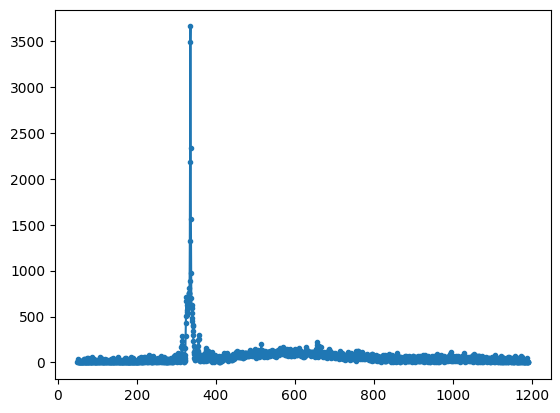

In [109]:
plt.plot(wavelength_scaled, input_NH3[0],'.-')
plt.show()

In [113]:
# scaling the intensity
input_NH3_scaled = []
for idx, l in enumerate(input_NH3):
    temp = []
    temp_max = l.max()
    temp_min = l.min()
    for j in input_NH3[idx]:
        temp.append((j-temp_min)/(temp_max-temp_min))
    input_NH3_scaled.append(temp)

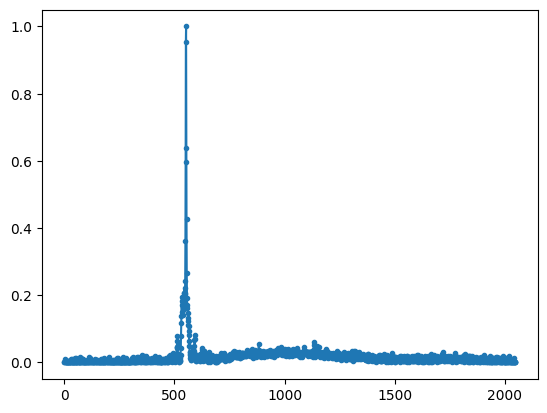

In [114]:
plt.plot(input_NH3_scaled[0],'.-')
plt.show()

In [119]:
NH3_input = pd.DataFrame(input_NH3_scaled)
NH3_input.columns = df.columns
NH3_input.index.name = 'cycle'
NH3_input.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.004101,0.002187,0.004647,0.009568,0.000000,0.001367,0.0,0.0,...,0.0,0.000000,0.0,0.00164,0.000000,0.013669,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000508,0.000000,0.004319,0.008638,0.000508,0.000000,0.0,0.0,...,0.0,0.001524,0.0,0.00000,0.001270,0.011433,0.0,0.0,0.0,0.001016
2,0.0,0.0,0.005486,0.002494,0.004738,0.011970,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.001746,0.011471,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.000716,0.002387,0.001910,0.007878,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.001432,0.011220,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.000711,0.000000,0.002134,0.008063,0.000949,0.000949,0.0,0.0,...,0.0,0.001186,0.0,0.00166,0.000711,0.012094,0.0,0.0,0.0,0.000000


In [120]:
NH3_input.to_csv('data/NH3_input.csv')

In [121]:
path = '../20250108_N2/' # process 4
file = os.listdir(path)

dfs = []
for f in file[5:104]:
    dfs.append(pd.read_csv(path+f, index_col='Time'))    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)

def DropFromSecond(x):
    x = x * 100
    x = np.floor(x)
    return x/100

# Given the spectrometer measures 200 - 1100 nn, drop columns outside this range
# df = df[df.columns[296:]]
new_col = [str(DropFromSecond(x)) for x in df.columns.astype(float)]
df.columns = new_col
df.index = [0.5*i for i in range(len(df.index))]

# negative values replaced by zero
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        if df.iloc[i,j]<0:
            df.iloc[i,j]=0
            
df.head()

(12177, 2048)


,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
0.0,0.0,0.0,8.0,11.0,0.0,48.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,54.0,10.0,0.0,0.0,0.0
0.5,0.0,0.0,7.0,0.0,18.0,41.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,52.0,1.0,0.0,0.0,0.0
1.0,0.0,0.0,14.0,8.0,13.0,42.0,0.0,1.0,2.0,0.0,...,0.0,2.0,0.0,2.0,8.0,57.0,2.0,0.0,0.0,0.0
1.5,0.0,0.0,22.0,1.0,21.0,34.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,39.0,0.0,0.0,0.0,13.0
2.0,0.0,0.0,14.0,2.0,17.0,41.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0


In [122]:
# remove N2 peaks from the pattern1
# make them interactive
import plotly.graph_objects as go

x = df.index.values
y =  df['336.67'].values
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_title='Wavelegnth [nm]', yaxis_range=[4000,5000], yaxis_title='Intensity [a.u.]', title='Process #3; NH3')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
mycolor = colors[1]
scatter.line.color = mycolor
scatter.marker.color = [mycolor] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [mycolor] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#F876FF'},
              'marker': {'color': [#F876FF, #F876FF, #F876FF, ..., #F876FF,
                                   #F876FF, #F876FF],
                         'line': {'color': [#F876FF, #F876FF, #F876FF, ...,
                                            #F876FF, #F876FF, #F876FF],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '1d631115-f64d-4d08-b3d8-d6d07e3136cf',
              'x': array([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 6.0870e+03, 6.0875e+03,
                          6.0880e+03]),
              'y': array([15., 10.,  6., ..., 11.,  8., 20.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #3; NH3'},
               'xaxis': {'gridcolor': 'l

In [123]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'time':x, 'intensity [a.u.]':y})
df_clicked = df_clicked.sort_values(by='time')
df_clicked

,time,intensity [a.u.]
0,26.5,49656
1,65.0,49433
2,103.0,49722
3,141.5,49440
4,179.5,49850
...,...,...
114,4422.0,46395
115,4460.0,46464
116,4498.5,46445
117,4537.0,46812


In [124]:
time = df_clicked['time']
input_N2 = []
for i in time:
    input_N2.append(df.loc[i].values)

print(input_NH3[0].max())
print(input_NH3[0])
print(len(input_NH3))

3658.0
[ 0.  0. 15. ...  0.  0.  0.]
63


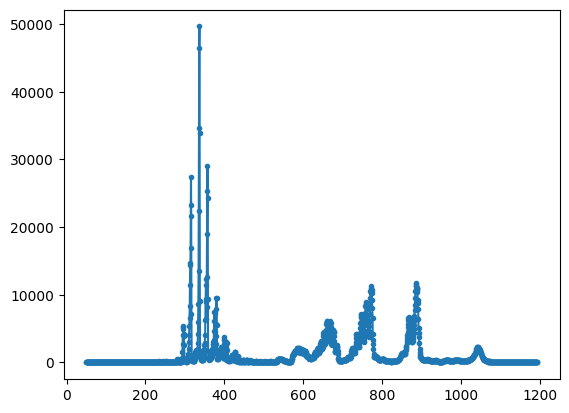

In [125]:
plt.plot(wavelength_scaled, input_N2[0],'.-')
plt.show()

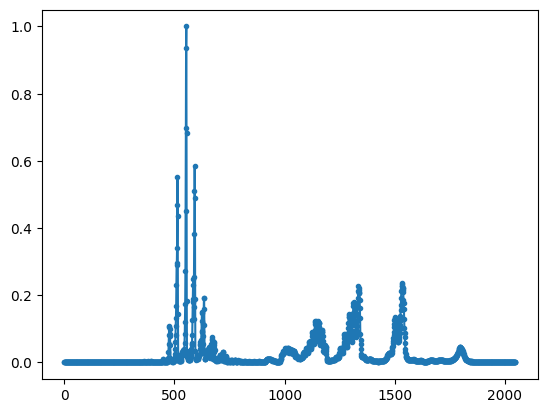

In [126]:
# scaling the intensity
input_N2_scaled = []
for idx, l in enumerate(input_N2):
    temp = []
    temp_max = l.max()
    temp_min = l.min()
    for j in input_N2[idx]:
        temp.append((j-temp_min)/(temp_max-temp_min))
    input_N2_scaled.append(temp)

plt.plot(input_N2_scaled[0],'.-')
plt.show()

In [128]:
N2_input = pd.DataFrame(input_N2_scaled)
N2_input.columns = df.columns
N2_input.index.name = 'cycle'
N2_input.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.000423,0.000040,0.000463,0.000644,0.0,0.000060,0.000141,0.0,...,0.0,0.00002,0.00000,0.000000,0.000262,0.001087,0.000000,0.0,0.0,0.00004
1,0.0,0.0,0.000486,0.000405,0.000142,0.000546,0.0,0.000040,0.000000,0.0,...,0.0,0.00000,0.00000,0.000182,0.000101,0.001011,0.000000,0.0,0.0,0.00000
2,0.0,0.0,0.000261,0.000000,0.000221,0.000483,0.0,0.000241,0.000000,0.0,...,0.0,0.00000,0.00004,0.000101,0.000282,0.000825,0.000000,0.0,0.0,0.00000
3,0.0,0.0,0.000081,0.000000,0.000485,0.000546,0.0,0.000000,0.000162,0.0,...,0.0,0.00000,0.00000,0.000121,0.000040,0.001092,0.000202,0.0,0.0,0.00000
4,0.0,0.0,0.000120,0.000000,0.000160,0.000642,0.0,0.000261,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.000000,0.000822,0.000000,0.0,0.0,0.00000


In [129]:
N2_input.to_csv('data/N2_input.csv')